# import libraries

In [ ]:
from glob import glob
import cv2
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.applications.densenet import DenseNet169
from tensorflow.keras.applications import VGG16, VGG19
from sklearn.model_selection import cross_validate, KFold
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,\
    confusion_matrix, f1_score, precision_score, recall_score, roc_curve, auc
from google.colab import drive

# Get Dataset

Download dataset first time and save to google drive


In [ ]:
# drive.mount('/content/drive')
# ! wget -P /content/drive/MyDrive https://github.com/muhammedtalo/COVID-19/archive/refs/heads/master.zip
# ! unzip -q "/content/drive/MyDrive/Source/DeepLearning/Monkeypox /Dataset/Monkeypox-Dataset.zip" -d "/content/drive/MyDrive/Source/DeepLearning/Monkeypox /Dataset/Extract"

run this cell when dataset exist in google drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data

load images directory

In [ ]:
images_path = {}
images_path["MonkeyPox"] = glob(
    "/content/drive/MyDrive/Source/DeepLearning/Monkeypox/Dataset/Extract"\
    "/Original Images/Original Images/Monkey Pox/*.png")
images_path["MonkeyPox"] += glob(
    "/content/drive/MyDrive/Source/DeepLearning/Monkeypox/Dataset/Extract"\
    "/Original Images/Original Images/Monkey Pox/*.jpeg")
images_path["MonkeyPox"] += glob(
    "/content/drive/MyDrive/Source/DeepLearning/Monkeypox/Dataset/Extract"\
    "/Original Images/Original Images/Monkey Pox/*.jpg")

images_path["Others"] = glob(
    "/content/drive/MyDrive/Source/DeepLearning/Monkeypox/Dataset/Extract"\
    "/Original Images/Original Images/Others/*.png")
images_path["Others"] += glob(
    "/content/drive/MyDrive/Source/DeepLearning/Monkeypox/Dataset/Extract"\
    "/Original Images/Original Images/Others/*.jpeg")
images_path["Others"] += glob(
    "/content/drive/MyDrive/Source/DeepLearning/Monkeypox/Dataset/Extract"\
    "/Original Images/Original Images/Others/*.jpg")


print(images_path["MonkeyPox"])
print(images_path["Others"])

images_class = {
    "MonkeyPox": 0,
    "Others": 1
}

['/content/drive/MyDrive/Source/DeepLearning/Monkeypox/Dataset/Extract/Original Images/Original Images/Monkey Pox/M23_01.jpg', '/content/drive/MyDrive/Source/DeepLearning/Monkeypox/Dataset/Extract/Original Images/Original Images/Monkey Pox/M33_02.jpg', '/content/drive/MyDrive/Source/DeepLearning/Monkeypox/Dataset/Extract/Original Images/Original Images/Monkey Pox/M13_01.jpg', '/content/drive/MyDrive/Source/DeepLearning/Monkeypox/Dataset/Extract/Original Images/Original Images/Monkey Pox/M25_02.jpg', '/content/drive/MyDrive/Source/DeepLearning/Monkeypox/Dataset/Extract/Original Images/Original Images/Monkey Pox/M50_03.jpg', '/content/drive/MyDrive/Source/DeepLearning/Monkeypox/Dataset/Extract/Original Images/Original Images/Monkey Pox/M20_01.jpg', '/content/drive/MyDrive/Source/DeepLearning/Monkeypox/Dataset/Extract/Original Images/Original Images/Monkey Pox/M16_01.jpg', '/content/drive/MyDrive/Source/DeepLearning/Monkeypox/Dataset/Extract/Original Images/Original Images/Monkey Pox/M43_

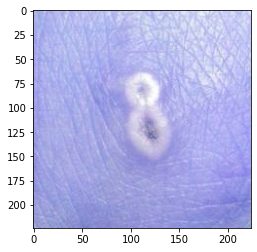

In [ ]:
X = []
Y = []

for label in images_path:
    for image_path in images_path[label]:
        image = cv2.imread(image_path)
        image = cv2.resize(image,(224, 224))
        X.append(image)
        Y.append(images_class[label])

plt.imshow(X[0])
plt.show()

(228, 224, 224, 3)
(228,)


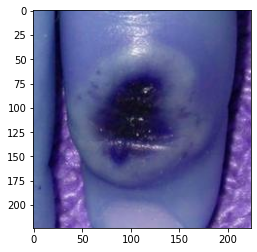

In [ ]:
print(np.array(X).shape)
print(np.array(Y).shape)
plt.imshow(X[100])

# Build model

build model and get features

In [ ]:
x = np.array(X)
y = np.array(Y)

# initial pre trained model
pre_trained_models = {}
pre_trained_models["VGG19"] = VGG19(include_top=False,
                                    input_shape=(224, 224, 3),
                                    pooling="avg")


80134624/80134624 [==============================] - 0s 0us/step


# Split train and test data

slpit and make flatten features

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=4708)

X_train = pre_trained_models["VGG19"].predict(X_train)
X_test = pre_trained_models["VGG19"].predict(X_test)

2/2 [==============================] - 20s 6s/step


In [ ]:
print(X_train.shape)

(182, 512)


# Classification

initial XGBoost classifier

In [ ]:
result = {}

XGB_Classifier = XGBClassifier()

fit XGBoost classifier

In [ ]:
XGB_Classifier.fit(X_train, Y_train)

Y_pred = XGB_Classifier.predict(X_test)

print result

In [ ]:
result["Accuracy score"] = accuracy_score(Y_test, Y_pred)
result["confusion matrix"] = confusion_matrix(Y_test, Y_pred)
result["f1 score"] = f1_score(Y_test, Y_pred, average="macro")
result["precision score"] = precision_score(Y_test, Y_pred, average="macro")
result["Sensitivity"] = result["confusion matrix"][0,0] / (result["confusion matrix"][0,0] + result["confusion matrix"][0,1])
result["Specifity"] = result["confusion matrix"][1,1] / (result["confusion matrix"][1,0] + result["confusion matrix"][1,1])

print(f"\n============")
print(f"\nAccuracy score : ", result["Accuracy score"])
print(f"\nconfusion matrix : \n", result["confusion matrix"])
print(f"\nf1 score : ", result["f1 score"])
print(f"\nprecision score : ", result["precision score"])
print(f"\nSpecifity : ", result["Specifity"])
print(f"\nSensitivity : ", result["Sensitivity"])



Accuracy score :  1.0

confusion matrix : 
 [[23  0]
 [ 0 23]]

f1 score :  1.0

precision score :  1.0

Specifity :  1.0

Sensitivity :  1.0
